In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statistics

In [2]:
df = pd.read_csv('salary.csv', encoding= 'unicode_escape')
df.head()

,Unnamed: 0,X,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,salary,role,location,Python,SQL,PhD,Master,Bachelor,High_Ed
0,1,1,American Family Insurance,3.2,Actuarial Data Scientist II - Personal Auto (H...,"Madison, WI",Employer est.:$145K,"At American Family Insurance, we believe peopl...",https://www.glassdoor.com/partner/jobListing.h...,145.0,Data Scientist,WI,0,0,None,None,Bachelor,Bachelor
1,2,2,Deloitte,4.1,Cloud Data Engineer,"Rosslyn, VA",$88K - $128K (Glassdoor est.),"In this age of disruption, organizations need ...",https://www.glassdoor.com/partner/jobListing.h...,108.0,Data Engineer,VA,0,0,None,None,Bachelor,Bachelor
2,3,3,"The Travelers Companies, Inc.",4.0,"Cloud Data Engineer I - AWS, Python, Snowflake...","Hartford, CT",Employer est.:$103K - $169K,"Who Are We?\nTaking care of our customers, our...",https://www.glassdoor.com/partner/jobListing.h...,136.0,Data Engineer,CT,1,0,None,None,Bachelor,Bachelor
3,4,4,American Family Insurance,3.2,Business Analytics Manager II (Advanced Analyt...,"Madison, WI",Employer est.:$111K,"At American Family Insurance, we believe peopl...",https://www.glassdoor.com/partner/jobListing.h...,111.0,Data Analyst,WI,1,0,None,None,None,None
4,5,5,Medifast Inc,3.8,Director Engineering - Data Science & BI,"Baltimore, MD",$112K - $156K (Glassdoor est.),"About The OpportunityAt Medifast, our team mem...",https://www.glassdoor.com/partner/jobListing.h...,134.0,Data Scientist,MD,1,1,None,Master,Bachelor,Master


In [16]:
df.head(1)[['companyName']].to_string()

'                 companyName\n0  American Family Insurance'

In [25]:
data = df['salary']

[Text(0.5, 1.0, 'Data Scientist Salary Density'), Text(0.5, 0, 'Salary(k)')]

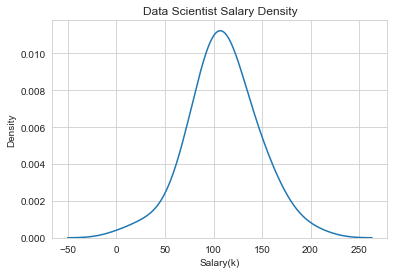

In [26]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw_method=0.5).set(title="Data Scientist Salary Density",xlabel='Salary(k)')

In [27]:
statistics.median(data) # Note that it's k

108.0

### Median Salary by Job Title

Should display a dataframe and a graph.

In [28]:
# Medium Salary by Role
df[['salary','role']].groupby('role').median()

,salary
role,
Data Analyst,76.0
Data Engineer,119.5
Data Scientist,106.0
Machine Learning,130.0
Others,125.0


[Text(0.5, 1.0, 'Data Scientist Salary by Role'), Text(0.5, 0, 'Salary(k)')]

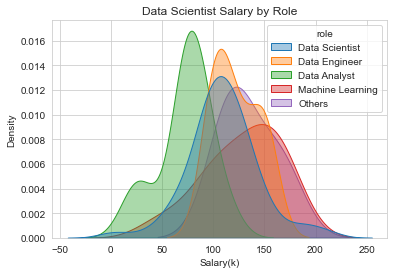

In [29]:
sns.kdeplot(data = df[['salary','role']], x = "salary", hue = "role", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Role",xlabel='Salary(k)')

### Median Salary by Location

Top 5 highest paid location

In [30]:
df_loc = df[['location', 'salary']].groupby('location').median().sort_values(by=['salary'],ascending = False).head(6)
df_loc

,salary
location,
CT,149.75
CO,149.50
UT,140.25
MO,132.00
DC,130.25
GA,128.50


In [31]:
list = [df_loc.index[0], df_loc.index[1], df_loc.index[2], df_loc.index[3], df_loc.index[4]]
list

['CT', 'CO', 'UT', 'MO', 'DC']

/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Data Scientist Salary by Location'),
 Text(0.5, 0, 'Salary(k)')]

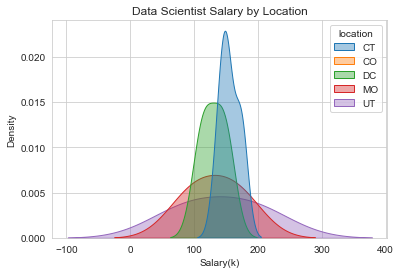

In [32]:
df_new = df[df.location.isin(list)]
sns.kdeplot(data = df_new[['salary','location']], x = "salary", hue = "location", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Location",xlabel='Salary(k)')

In [33]:
df_new['location'].value_counts()

CT    6
DC    4
CO    2
MO    2
UT    2
Name: location, dtype: int64

### Most Common Skill

In [34]:
df[['Python','SQL']].value_counts()

Python  SQL
1       1      39
0       0      30
1       0      20
0       1      10
dtype: int64

In [35]:
df[['Python', 'SQL']].sum(axis = 0) / df.shape[0]

Python    0.595960
SQL       0.494949
dtype: float64

In [36]:
#df_R = df[['R', 'salary']].groupby('R').mean()
df_Py = df[['Python', 'SQL', 'salary']].groupby(['Python','SQL']).mean()
df_Sql = df[['SQL', 'salary']].groupby('SQL').mean()
#print(df_R)
print(df_Py)
print(df_Sql) 

                salary
Python SQL            
0      0    107.800000
       1    126.300000
1      0    101.950000
       1    111.397436
         salary
SQL            
0    105.460000
1    114.438776


In [37]:
df[['Python', 'SQL', 'salary']]

,Python,SQL,salary
0,0,0,145.0
1,0,0,108.0
2,1,0,136.0
3,1,0,111.0
4,1,1,134.0
...,...,...,...
94,0,0,104.5
95,1,0,101.0
96,1,0,154.5
97,1,1,92.0


### By Education

In [40]:
df_ed = df[['High_Ed', 'salary']].groupby('High_Ed').median().sort_values(by=['salary'],ascending = False).head(6)
df_ed

,salary
High_Ed,
PhD,122.0
None,111.0
Bachelor,104.5
Master,91.0


[Text(0.5, 1.0, 'Data Scientist Salary by Education'),
 Text(0.5, 0, 'Salary(k)')]

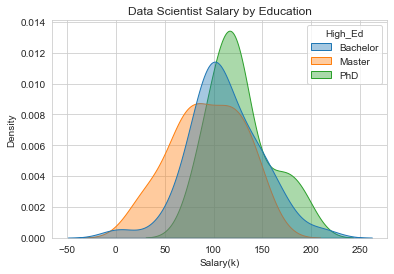

In [45]:
list_new = ["PhD", "Bachelor", "Master"]
df_new = df[df.High_Ed.isin(list_new)]
sns.kdeplot(data = df_new[['High_Ed','salary']], x = "salary", hue = "High_Ed", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Education",xlabel='Salary(k)')

In [47]:
df_ed = df_new[['PhD', 'Master', 'Bachelor','salary']].groupby(['PhD', 'Master', 'Bachelor']).mean()
print(df_ed)

                          salary
PhD  Master Bachelor            
None Master Bachelor   94.954545
            None       91.714286
     None   Bachelor  111.058140
PhD  Master Bachelor  114.000000
            None      128.545455
     None   None      145.750000
